# First look at invariant mass

## Imports and definitions

In [1]:
import sys; 
software_path = '/Users/erezcohen/Desktop/Software/'
sys.path.insert(0, software_path + '/mySoftware/Python/');
sys.path.insert(0, software_path + '/CLAS12/BAND/SIDIS_at_BAND/PythonAnalysis/AcceptanceCorrections/');
sys.path.insert(0, software_path + '/CLAS12/BAND/SIDIS_at_BAND/PythonAnalysis/python_auxiliary/');
from my_tools                     import *; 
from plot_tools                   import *;
from my_data_analysis_tools       import *;
from acceptance_correction_tools  import *;
from sidis_analysis_tools         import *;
%config InlineBackend.figure_format = 'retina'
plt.rcParams['mathtext.fontset']    = 'stix'
plt.rcParams['font.family']         = 'STIXGeneral'

Welcome to JupyROOT 6.26/06
Loaded bin migration and acceptance weights from MC calculations.


## (1) Load data

### (1.1) Load data file

In [122]:
data_path  = "/Users/erezcohen/Desktop/data/CLAS12/RGB/BranchingRatios/sidisdvcs"
subdirname = "sidisdvcs_25Dec2024_commit_6ee9374" 
run        = 6164
filename   = "skimmed_BranchingRatios_sidisdvcs_%06d_eep2gX.csv"%run
fullfile   = data_path + "/" + subdirname + "/" + filename
data = pd.read_csv(fullfile)
print('Loaded %dk events from %s run %d'%(len(data)/1000,subdirname,run))

Loaded 153k events from sidisdvcs_25Dec2024_commit_6ee9374 run 6164


(array([1.41064e+05, 1.04590e+04, 1.46600e+03, 2.85000e+02, 6.20000e+01,
        7.00000e+00, 3.00000e+00, 0.00000e+00, 1.00000e+00, 2.00000e+00]),
 array([0.    , 0.6871, 1.3742, 2.0613, 2.7484, 3.4355, 4.1226, 4.8097,
        5.4968, 6.1839, 6.871 ]),
 <BarContainer object of 10 artists>)

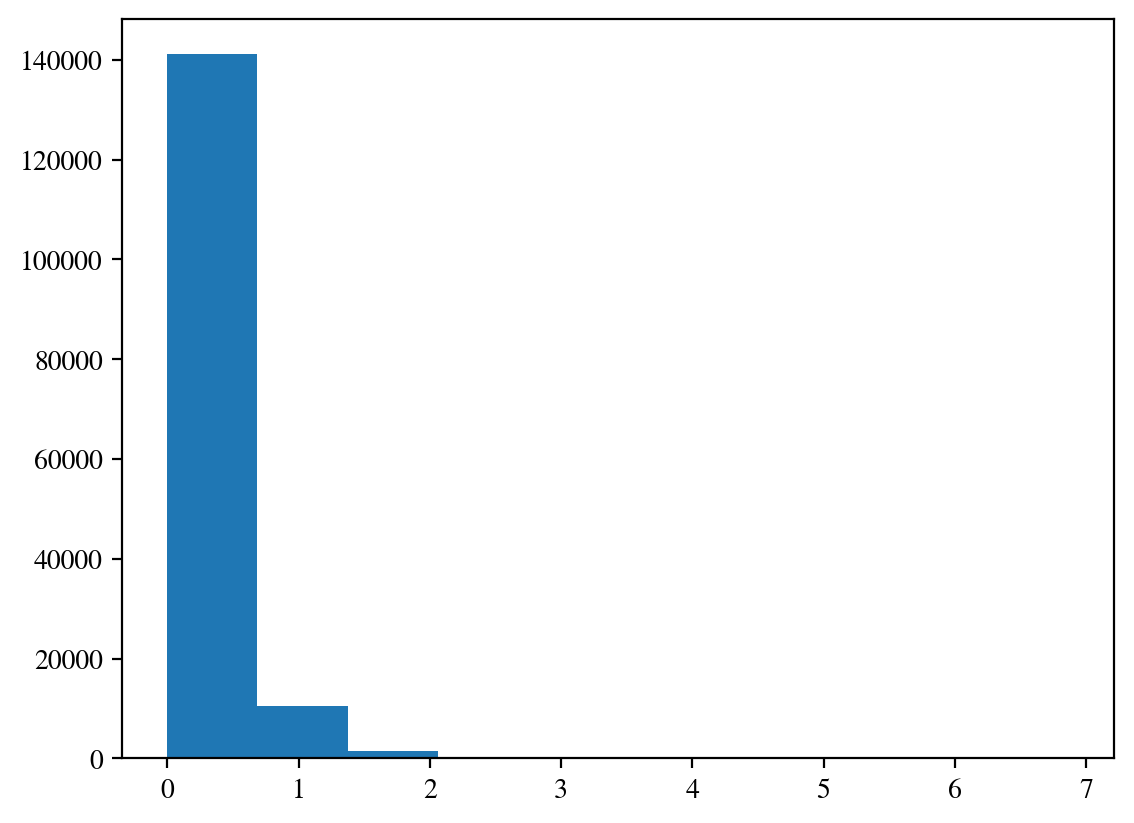

In [145]:
# data[data.evnum==1699].g1_PCAL_W
plt.hist(data.g1_PCAL_V)

### (1.2) Add cuts not previously imposed

Following G. Matousek 
"Measurements of Beam Spin Asymmetries of $\pi^\pm \pi^0$ dihadrons at CLAS12 using Gradient Boosted Trees

https://www.jlab.org/Hall-B/shifts/admin/paper_reviews/2024/PiPi0_AnalysisNote_(3)_3.pdf-7600066-2024-03-09-v1.pdf


1. $E(\gamma_1) > 10$ MeV and $E(\gamma_2) > 10$ MeV,
2. $5^\circ < \theta < 35^\circ$ for all reconstructed particles (forward detector) 
3. $E(PCAL) > 0$
4. PCAL calorimeter coordinates $lv$ and $lw$ within [14,400] cm
5. $0.9 < \beta(\gamma) < 1.1$

In [141]:
Eg_min = 0.0100
data_after_cuts = data[(data["g1_E"]>Eg_min) & (data["g2_E"]>Eg_min)]
print('Retained %dk events after energy cut'%(len(data_after_cuts)/1000))

Theta_min = 5  * 3.14/180.
Theta_max = 35 * 3.14/180.
data_after_cuts = data_after_cuts[  (Theta_min < data_after_cuts["e_Theta"])  & (data_after_cuts["e_Theta"] < Theta_max) 
                                  & (Theta_min < data_after_cuts["p_Theta"])  & (data_after_cuts["p_Theta"] < Theta_max) 
                                  & (Theta_min < data_after_cuts["g1_Theta"]) & (data_after_cuts["g1_Theta"] < Theta_max) 
                                  & (Theta_min < data_after_cuts["g2_Theta"]) & (data_after_cuts["g2_Theta"] < Theta_max) ]
print('Retained %dk events after theta cut'%(len(data_after_cuts)/1000))

EPCAL_min = 0
data_after_cuts = data_after_cuts[(EPCAL_min < data_after_cuts["g1_E_PCAL"]) & (EPCAL_min < data_after_cuts["g2_E_PCAL"])]
print('Retained %dk events after PCAL energy cut'%(len(data_after_cuts)/1000))




PCAL_V_min, PCAL_V_max = 14,400
PCAL_W_min, PCAL_W_max = 14,400
data_after_cuts = data_after_cuts[  (PCAL_V_min < data_after_cuts["g1_PCAL_V"]) & (data_after_cuts["g1_PCAL_V"] < PCAL_V_max)                    
                                  & (PCAL_W_min < data_after_cuts["g1_PCAL_W"]) & (data_after_cuts["g1_PCAL_W"] < PCAL_W_max)
                                  & (PCAL_V_min < data_after_cuts["g2_PCAL_V"]) & (data_after_cuts["g2_PCAL_V"] < PCAL_V_max)                    
                                  & (PCAL_W_min < data_after_cuts["g2_PCAL_W"]) & (data_after_cuts["g2_PCAL_W"] < PCAL_W_max)]
print('Retained %d events after PCAL coordinates cut'%(len(data_after_cuts)))


beta_min, beta_max = 0.9,1.1
data_after_cuts = data_after_cuts[  (beta_min < data_after_cuts["g1_beta"]) & (data_after_cuts["g1_beta"] < beta_max)                    
                                  & (beta_min < data_after_cuts["g2_beta"]) & (data_after_cuts["g2_beta"] < beta_max)]
print('Retained %d events'%(len(data_after_cuts)))

Retained 0 events after PCAL coordinates cut
Retained 122k events after energy cut
Retained 6k events after theta cut
Retained 3k events after PCAL energy cut
Retained 0 events


In [133]:
# len(data_after_cuts[data_after_cuts["g1_PCAL_V"] > 0.014])
# len(data_after_cuts[data_after_cuts["g1_beta"] > 0.9])
# data[0:10] #[data['evnum']==10669]#["g1_beta"]
# data["e_Theta"] * 180./3.14
np.max(data.g2_PCAL_W)

10.641

## (2) Plot distirbution of invariant mass of the two $\gamma$

In [86]:
M_pi  = 0.139
M_eta = 0.548
M_rho = 0.770

In [88]:
bins_Mgg=np.linspace(0,0.8,50)

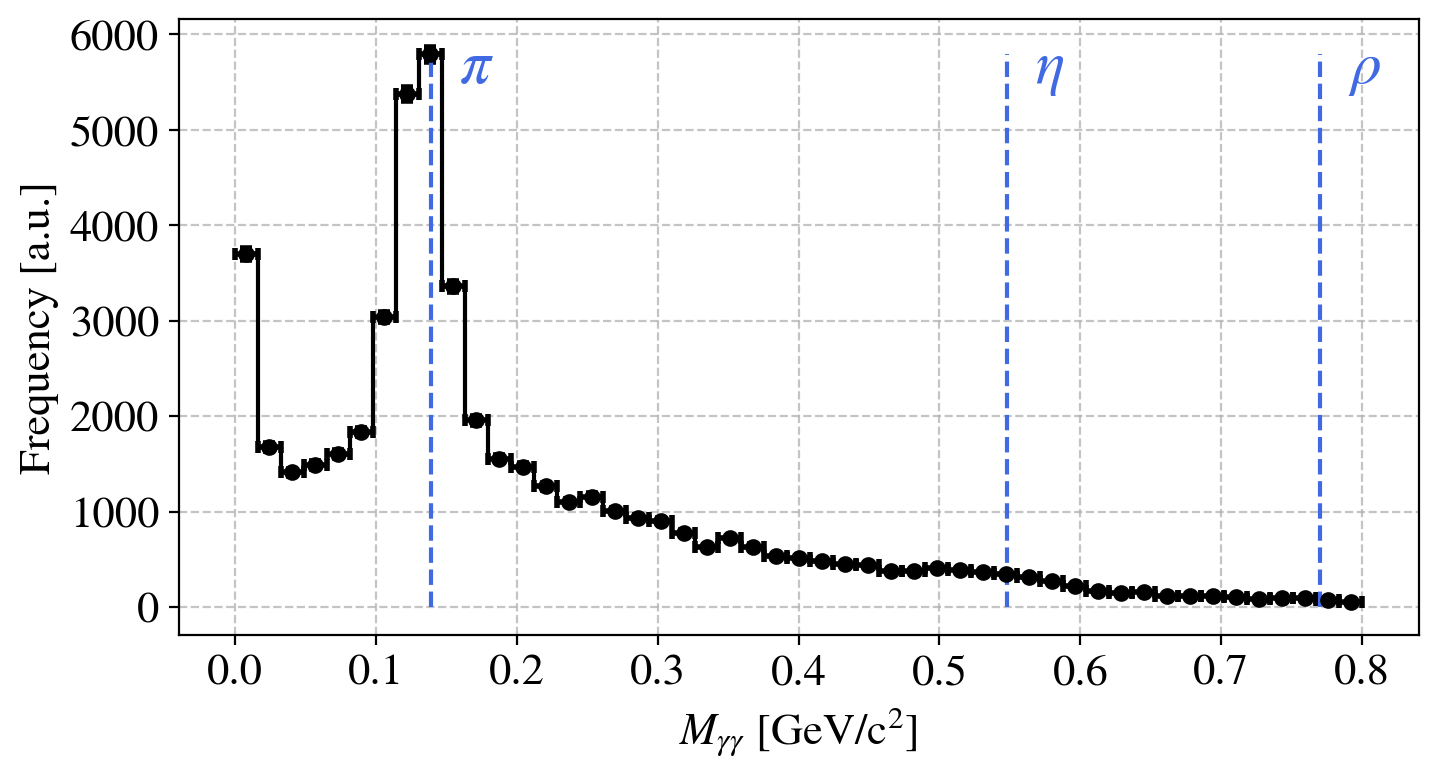

In [89]:
var = "Mgg"
x = data_after_cuts[var]
fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(1,1,1)
h = plot_step_hist(x,bins=bins_Mgg);
ymax = np.max(h)
for resname,M_res in zip(['\\pi','\\eta','\\rho'],[M_pi,M_eta,M_rho]):
    plt.vlines(M_res, 0,ymax,linestyles='--',colors='royalblue');
    plt.text(M_res+0.02,0.95*ymax,"$"+resname+"$",color='royalblue',fontsize=22)
set_axes(ax,'$M_{\gamma\gamma}$ [GeV/c$^2$]','Frequency [a.u.]',fontsize=16,do_add_grid=True);

## (3) Add a kinematic cut to clean up events?

### (3.1) Missing mass of the $(e,e'p2\gamma)$ reaction

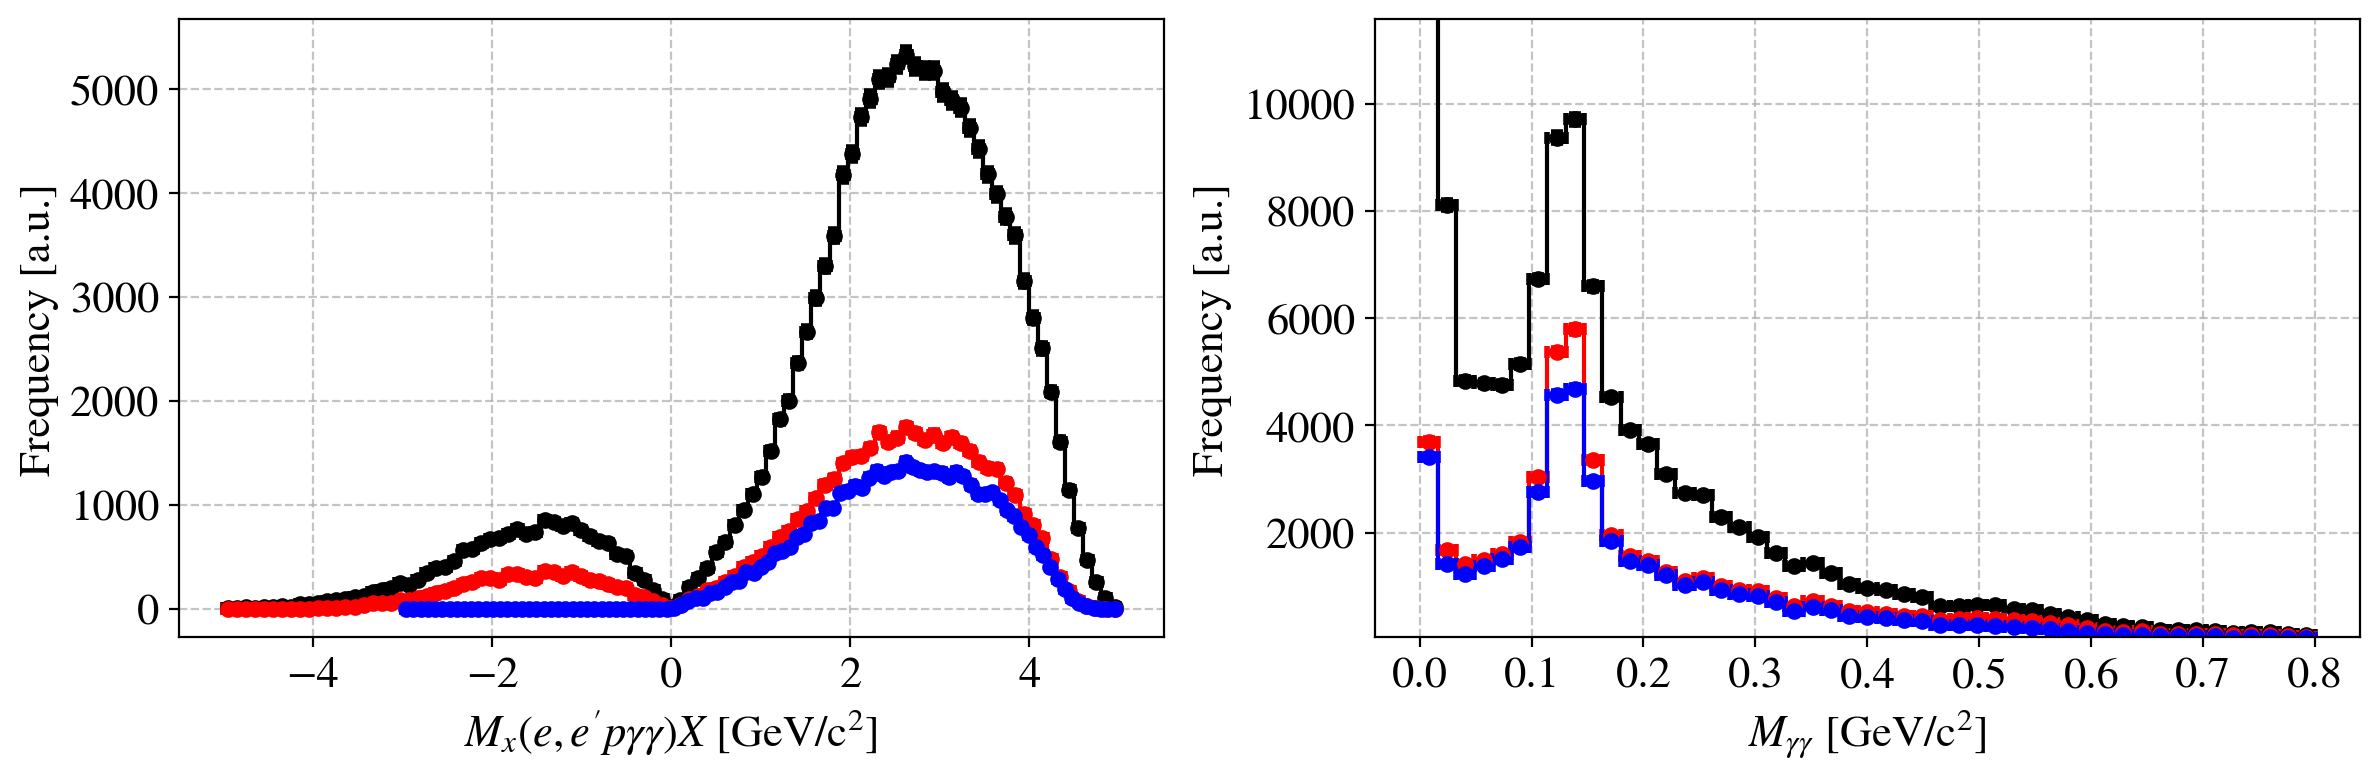

In [90]:
var = "M_x_deep2g"



fig = plt.figure(figsize=(12,4),tight_layout=True)
ax = fig.add_subplot(1,2,1)
h = plot_step_hist(data[var],bins=np.linspace(-5,5,100));
x = data_after_cuts[var]
h = plot_step_hist(x,bins=np.linspace(-5,5,100),color='red');
set_axes(ax,"$M_x(e,e'p\gamma\gamma)X$ [GeV/c$^2$]",'Frequency [a.u.]',fontsize=16,do_add_grid=True);
var_min = 0
h = plot_step_hist(x[x>var_min],bins=np.linspace(-3,5,100),color='blue');


data_sliced = data_after_cuts[data_after_cuts[var] > var_min]
var = "Mgg"
ax = fig.add_subplot(1,2,2)
h_all = plot_step_hist(data[var],            bins=bins_Mgg ,color='k');
h_cut = plot_step_hist(data_after_cuts[var], bins=bins_Mgg, color='r');
h_sliced = plot_step_hist(data_sliced[var],  bins=bins_Mgg, color='blue');
set_axes(ax,'$M_{\gamma\gamma}$ [GeV/c$^2$]','Frequency [a.u.]',fontsize=16,do_add_grid=True, ylim=(50,2*np.max(h_cut)));
# ax.set_yscale('log')

### (3.2) $E_\gamma > 0.2$ GeV

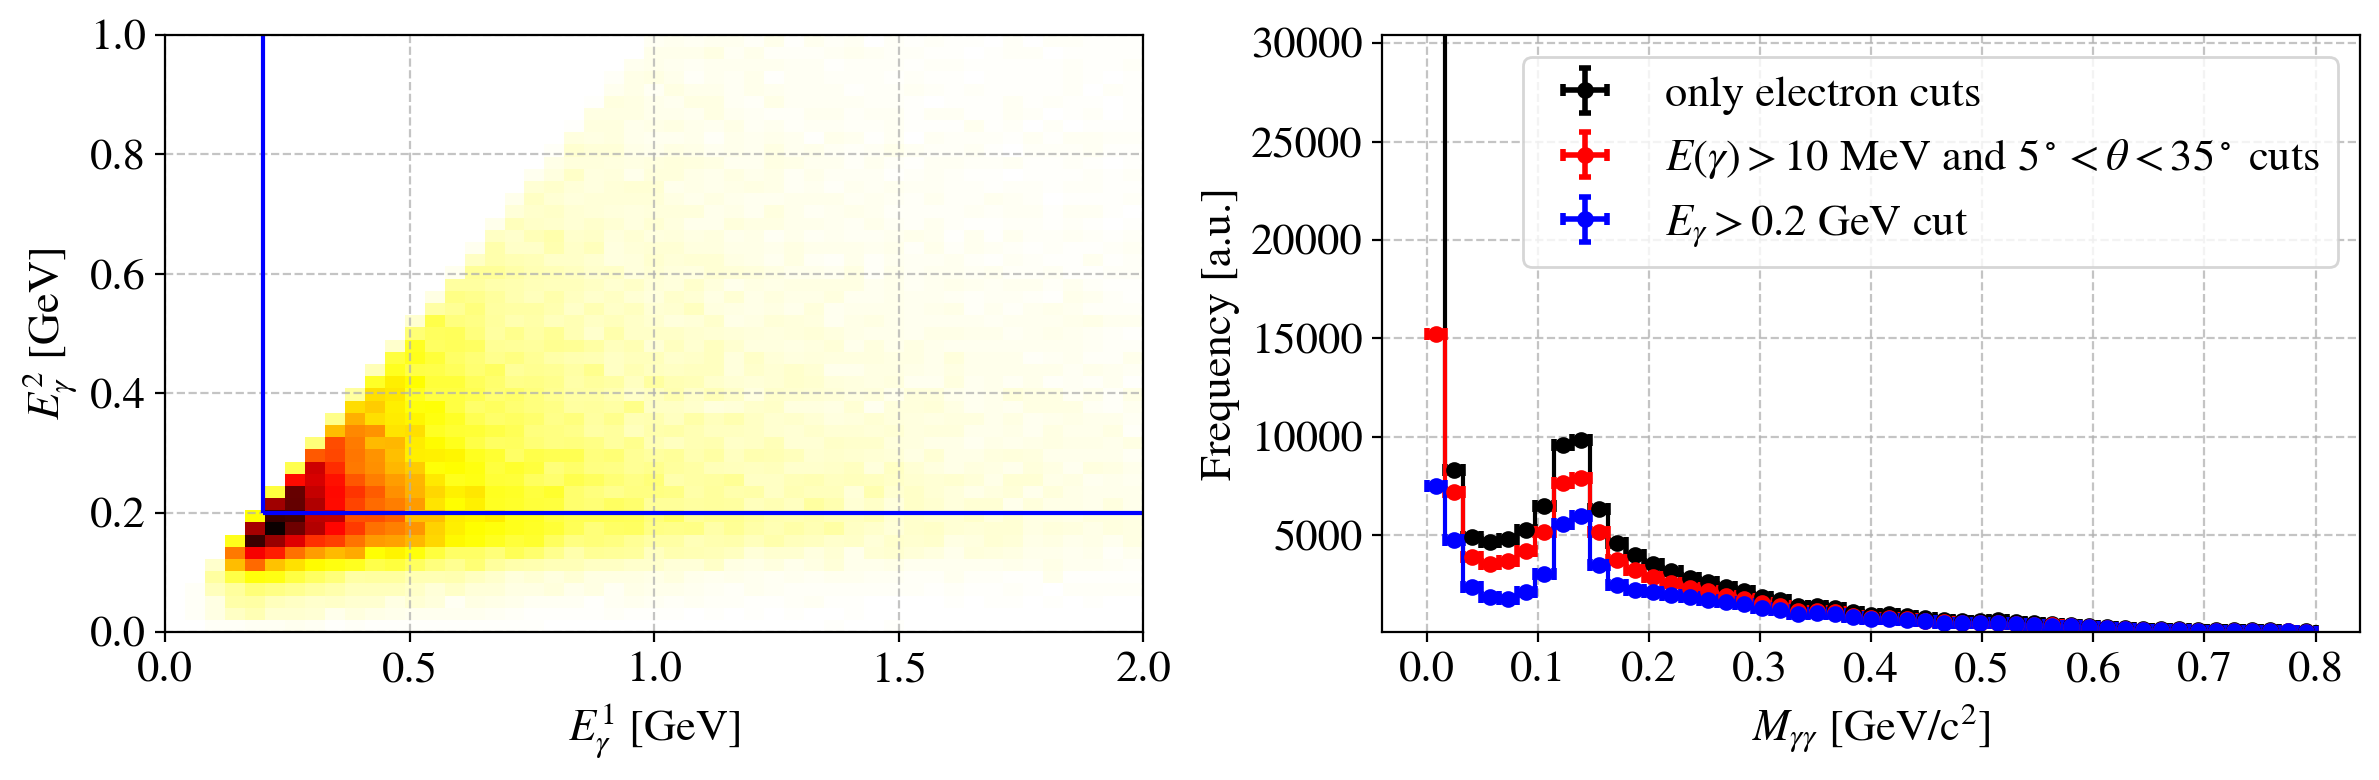

In [82]:
Eg_min = 0.2

x = data_after_cuts["g1_E"]
y = data_after_cuts["g2_E"]
fig = plt.figure(figsize=(12,4),tight_layout = True)
ax = fig.add_subplot(1,2,1)
plot_2d_hist(x,y,bins=(np.linspace(0,2,50),np.linspace(0,1,50)),ax=ax);
set_axes(ax,"$E_\gamma^1$ [GeV]","$E_\gamma^2$ [GeV]",fontsize=16,do_add_grid=True,xticks=(0,0.5,1,1.5,2));
plt.vlines(Eg_min,Eg_min,1,colors='b')
plt.hlines(Eg_min,Eg_min,2,colors='b')


data_sliced = data_after_cuts[(data_after_cuts["g1_E"] > Eg_min) & (data_after_cuts["g2_E"] > Eg_min)]
var = "Mgg"
ax = fig.add_subplot(1,2,2)
h_all = plot_step_hist(data[var],            bins=bins_Mgg ,color='k', label = 'only electron cuts');
h_cut = plot_step_hist(data_after_cuts[var], bins=bins_Mgg, color='r', label = '$E(\gamma) > 10$ MeV and $5^\circ < \\theta < 35^\circ$ cuts');
h_sliced = plot_step_hist(data_sliced[var],  bins=bins_Mgg, color='b', label = '$E_\gamma > 0.2$ GeV cut');
set_axes(ax,'$M_{\gamma\gamma}$ [GeV/c$^2$]','Frequency [a.u.]',fontsize=16,do_add_grid=True, ylim=(50,2*np.max(h_cut)), do_add_legend=True);


### (3...) Energy and momentum transfer

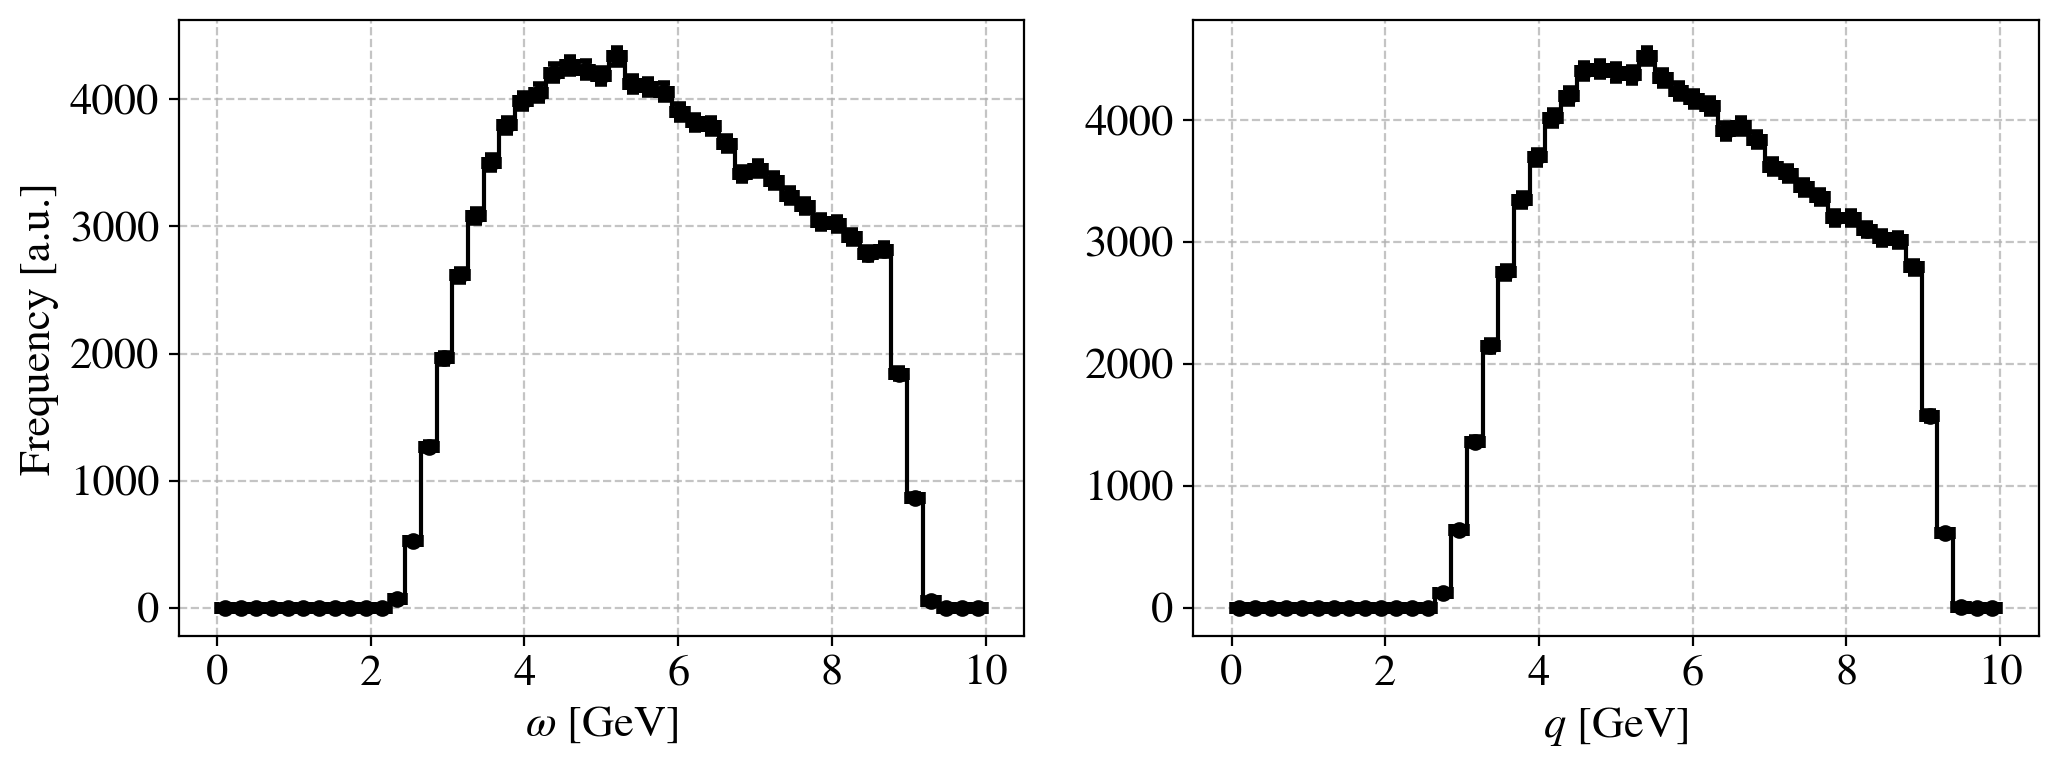

In [7]:
var = "omega"
x = data_after_cuts[var]
fig = plt.figure(figsize=(12,4))
ax = fig.add_subplot(1,2,1)
h = plot_step_hist(x,bins=np.linspace(0,10,50));
set_axes(ax,"$\omega$ [GeV]",'Frequency [a.u.]',fontsize=16,do_add_grid=True);

var = "q"
x = data_after_cuts[var]
ax = fig.add_subplot(1,2,2)
h = plot_step_hist(x,bins=np.linspace(0,10,50));
set_axes(ax,"$q$ [GeV]",'',fontsize=16,do_add_grid=True);

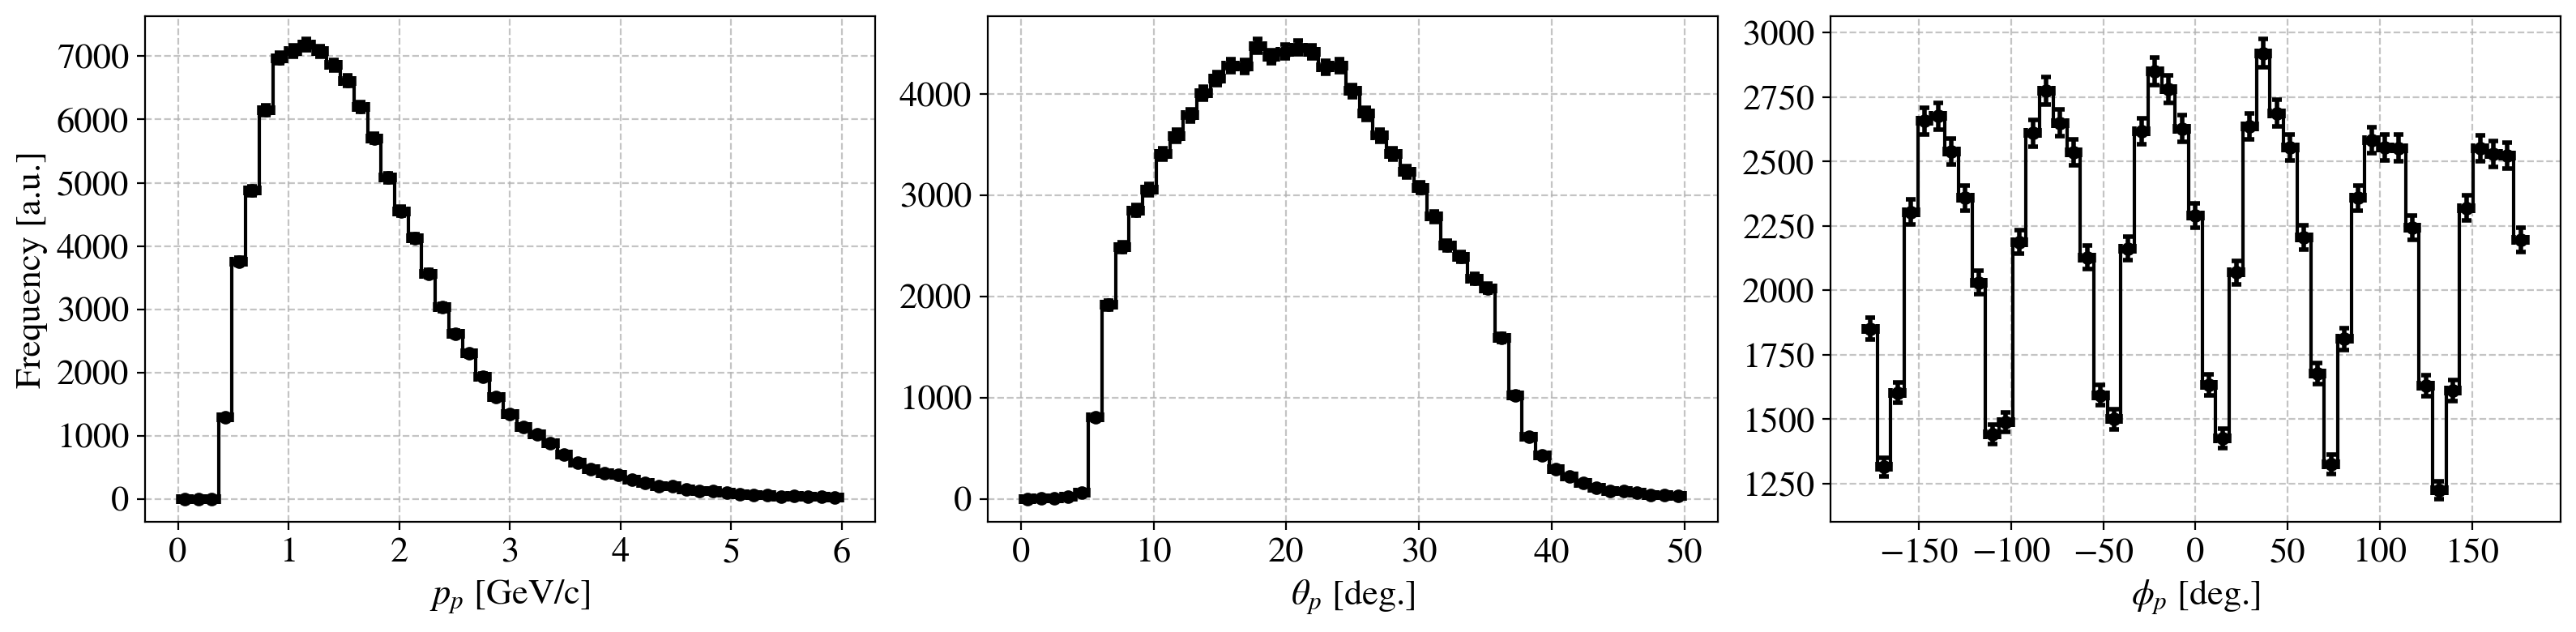

In [8]:
fig = plt.figure(figsize=(16,4),tight_layout=True)

var = "p_P"
x = data_after_cuts[var]
ax = fig.add_subplot(1,3,1)
h = plot_step_hist(x,bins=np.linspace(0,6,50));
set_axes(ax,"$p_p$ [GeV/c]",'Frequency [a.u.]',fontsize=16,do_add_grid=True);

var = "p_Theta"
x = data_after_cuts[var]*180./3.14
ax = fig.add_subplot(1,3,2)
h = plot_step_hist(x,bins=np.linspace(0,50,50));
set_axes(ax,"$\\theta_p$ [deg.]",'',fontsize=16,do_add_grid=True);

var = "p_Phi"
x = data_after_cuts[var]*180./3.14
ax = fig.add_subplot(1,3,3)
h = plot_step_hist(x,bins=np.linspace(-180,180,50));
set_axes(ax,"$\phi_p$ [deg.]",'',fontsize=16,do_add_grid=True);

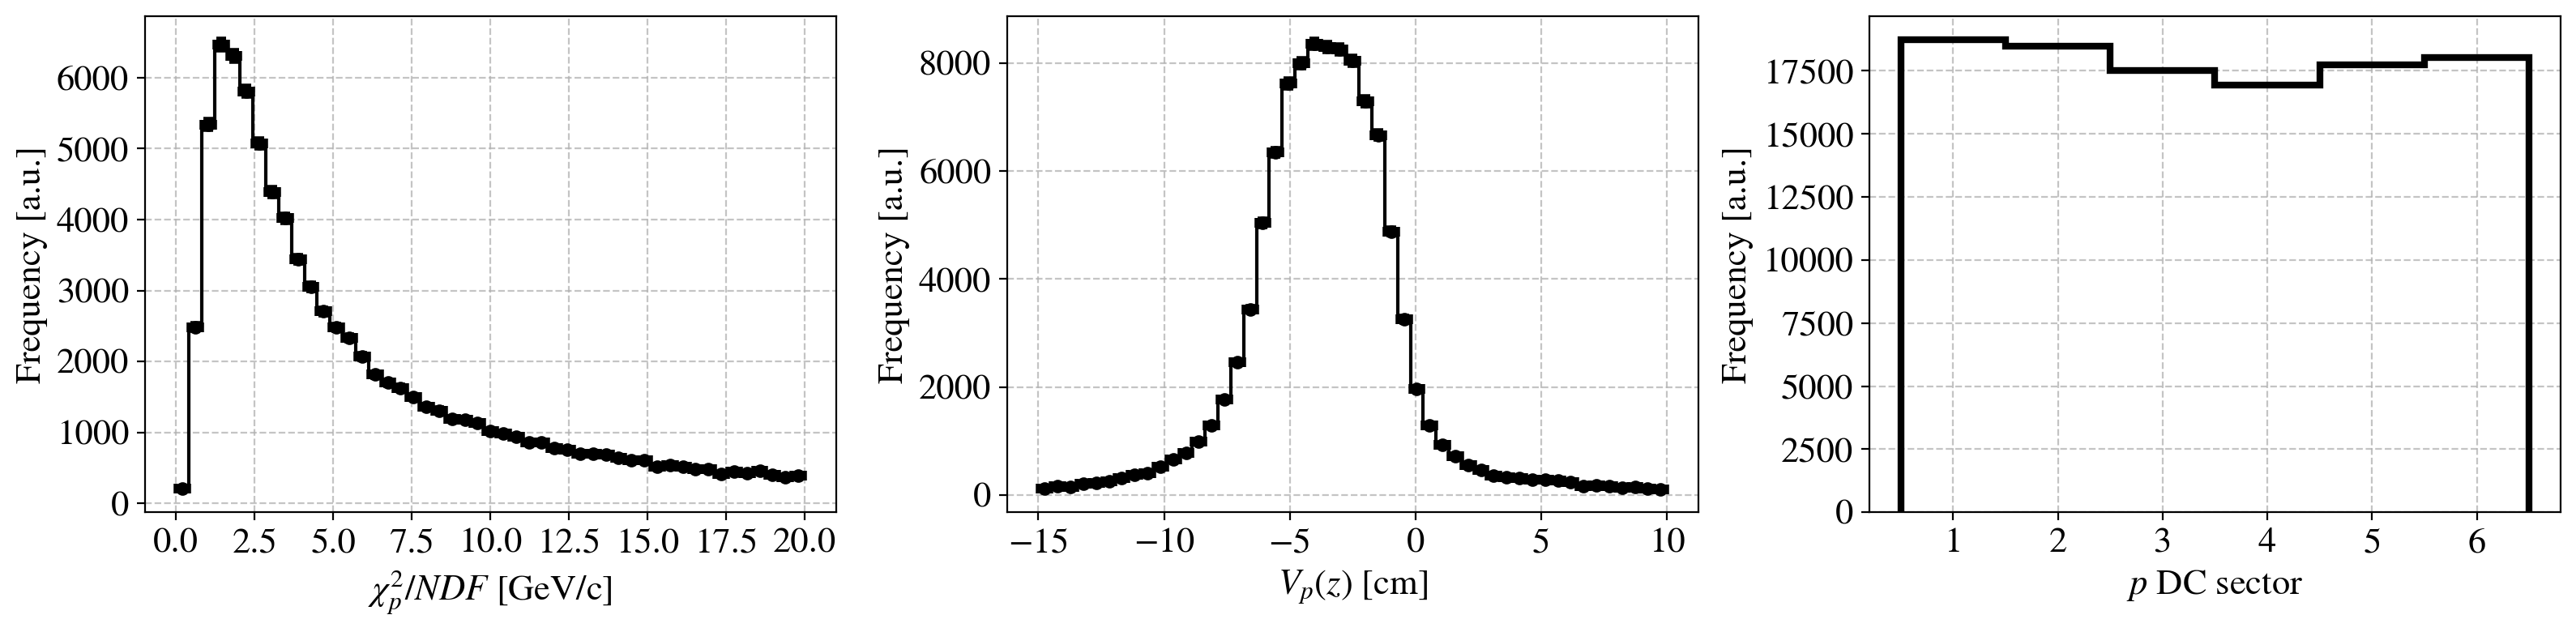

In [9]:
fig = plt.figure(figsize=(16,4),tight_layout=True)

var = "p_DC_Chi2N"
x = data_after_cuts[var]
ax = fig.add_subplot(1,3,1)
h = plot_step_hist(x,bins=np.linspace(0,20,50));
set_axes(ax,"$\chi^2_p/NDF$ [GeV/c]",'Frequency [a.u.]',fontsize=16,do_add_grid=True);

var = "p_Vz"
x = data_after_cuts[var]
ax = fig.add_subplot(1,3,2)
h = plot_step_hist(x,bins=np.linspace(-15,10,50));
set_axes(ax,"$V_p(z)$ [cm]",'Frequency [a.u.]',fontsize=16,do_add_grid=True);

var = "p_DC_sector"
x = data_after_cuts[var]
ax = fig.add_subplot(1,3,3)
h = plot_discrete_histogram(x);
set_axes(ax,"$p$ DC sector",'Frequency [a.u.]',fontsize=16,do_add_grid=True);



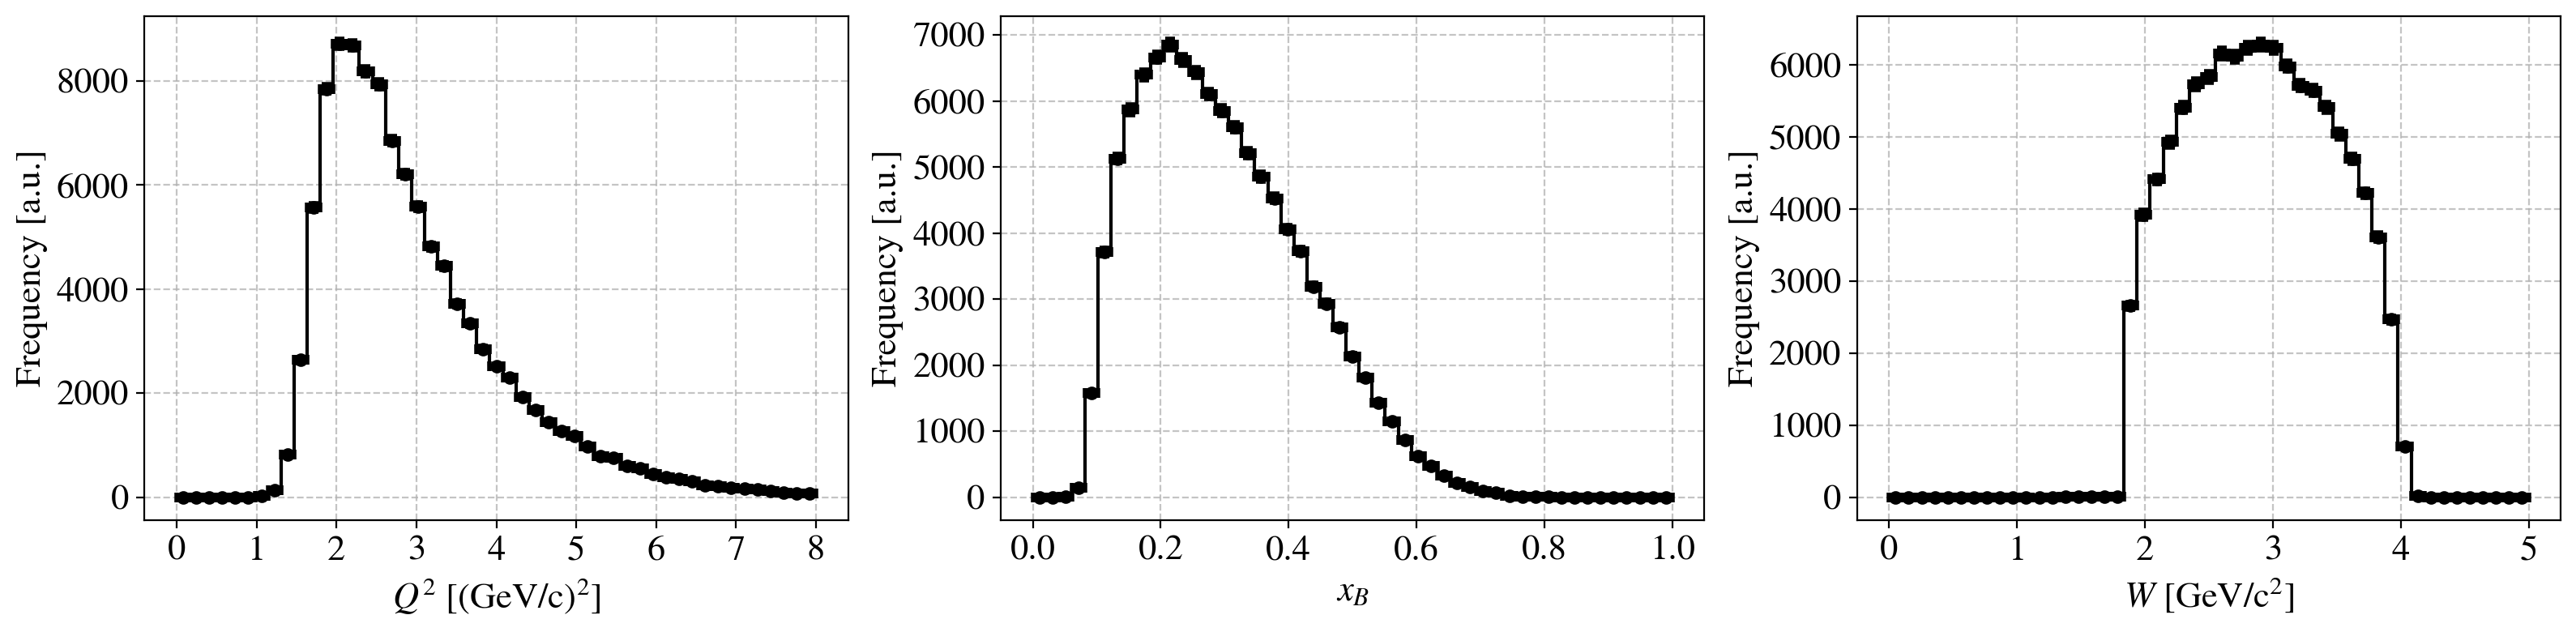

In [10]:
fig = plt.figure(figsize=(16,4),tight_layout=True)

var = "Q2"
x = data_after_cuts[var]
ax = fig.add_subplot(1,3,1)
h = plot_step_hist(x,bins=np.linspace(0,8,50));
set_axes(ax,"$Q^2$ [(GeV/c)$^2$]",'Frequency [a.u.]',fontsize=16,do_add_grid=True);

var = "xB"
x = data_after_cuts[var]
ax = fig.add_subplot(1,3,2)
h = plot_step_hist(x,bins=np.linspace(0,1,50));
set_axes(ax,"$x_B$",'Frequency [a.u.]',fontsize=16,do_add_grid=True);

var = "W"
x = data_after_cuts[var]
ax = fig.add_subplot(1,3,3)
h = plot_step_hist(x,bins=np.linspace(0,5,50));
set_axes(ax,"$W$ [GeV/c$^2$]",'Frequency [a.u.]',fontsize=16,do_add_grid=True);


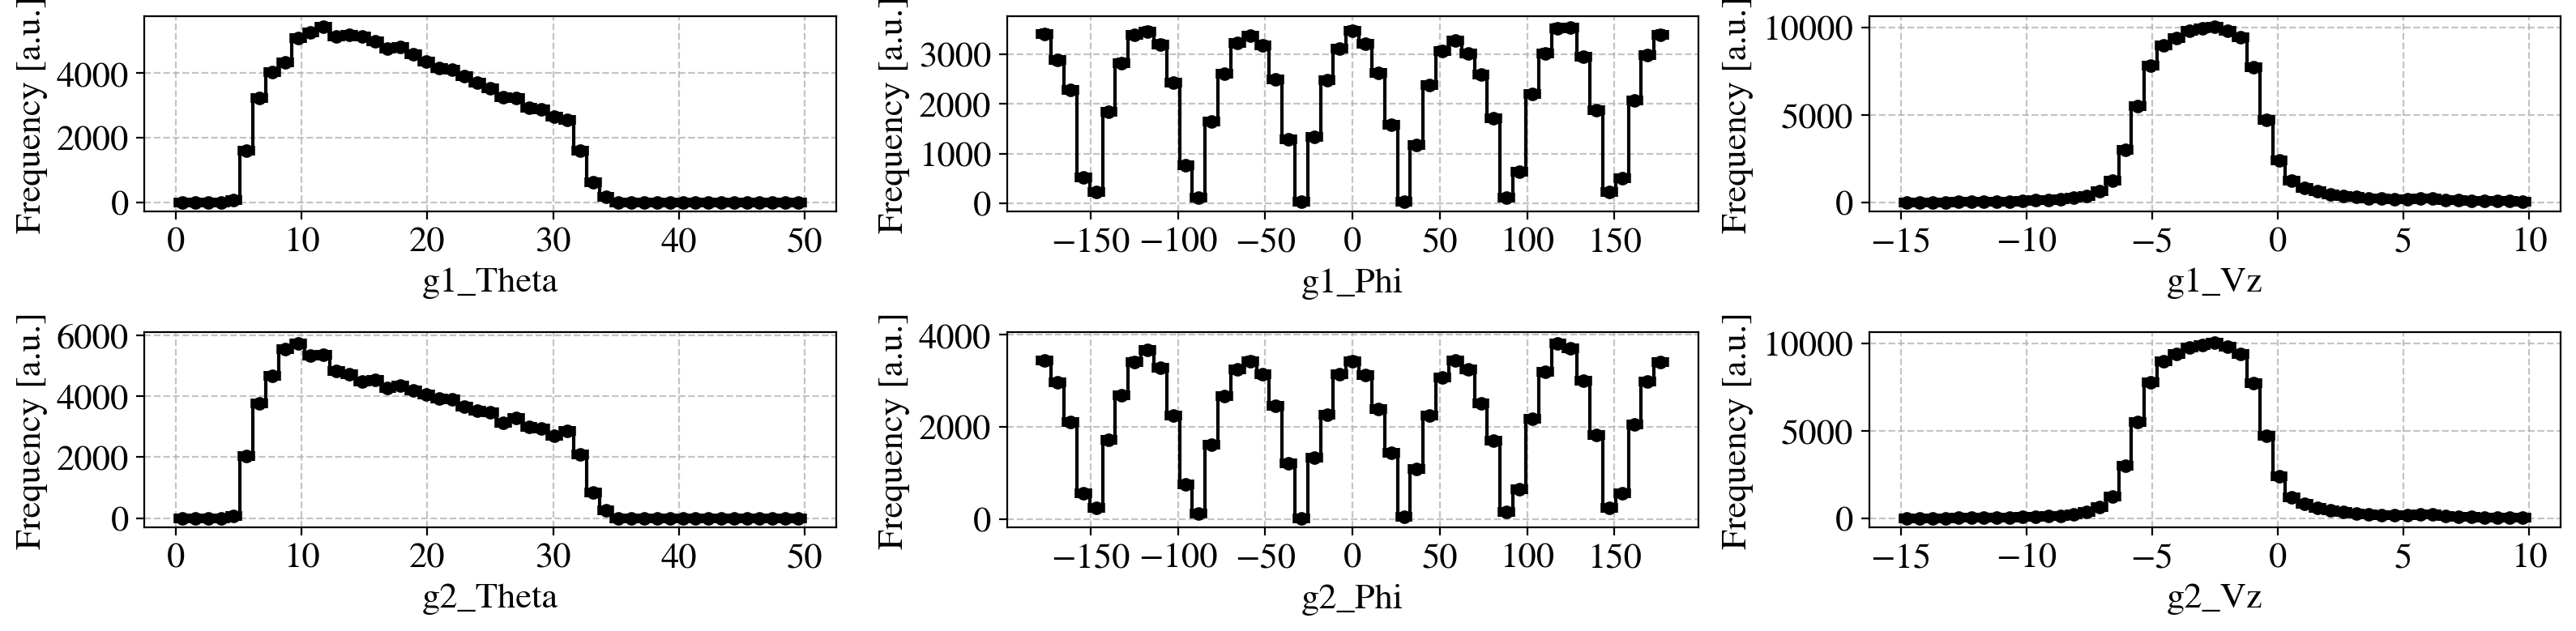

In [11]:
fig = plt.figure(figsize=(16,4),tight_layout=True)

var = "g1_Theta"
x = data_after_cuts[var]*180./3.14
ax = fig.add_subplot(2,3,1)
h = plot_step_hist(x,bins=np.linspace(0,50,50));
set_axes(ax,"g1_Theta",'Frequency [a.u.]',fontsize=16,do_add_grid=True);

var = "g1_Phi"
x = data_after_cuts[var]*180./3.14
ax = fig.add_subplot(2,3,2)
h = plot_step_hist(x,bins=np.linspace(-180,180,50));
set_axes(ax,"g1_Phi",'Frequency [a.u.]',fontsize=16,do_add_grid=True);

var = "g1_Vz"
x = data_after_cuts[var]
ax = fig.add_subplot(2,3,3)
h = plot_step_hist(x,bins=np.linspace(-15,10,50));
set_axes(ax,"g1_Vz",'Frequency [a.u.]',fontsize=16,do_add_grid=True);

var = "g2_Theta"
x = data_after_cuts[var]*180./3.14
ax = fig.add_subplot(2,3,4)
h = plot_step_hist(x,bins=np.linspace(0,50,50));
set_axes(ax,"g2_Theta",'Frequency [a.u.]',fontsize=16,do_add_grid=True);

var = "g2_Phi"
x = data_after_cuts[var]*180./3.14
ax = fig.add_subplot(2,3,5)
h = plot_step_hist(x,bins=np.linspace(-180,180,50));
set_axes(ax,"g2_Phi",'Frequency [a.u.]',fontsize=16,do_add_grid=True);

var = "g2_Vz"
x = data_after_cuts[var]
ax = fig.add_subplot(2,3,6)
h = plot_step_hist(x,bins=np.linspace(-15,10,50));
set_axes(ax,"g2_Vz",'Frequency [a.u.]',fontsize=16,do_add_grid=True);



In [14]:
np.max(data_after_cuts["g1_E_CN"])
# data["g1_E_EC"][1:]
# data[data.evnum==10669]['g1_E_EC']

0.0

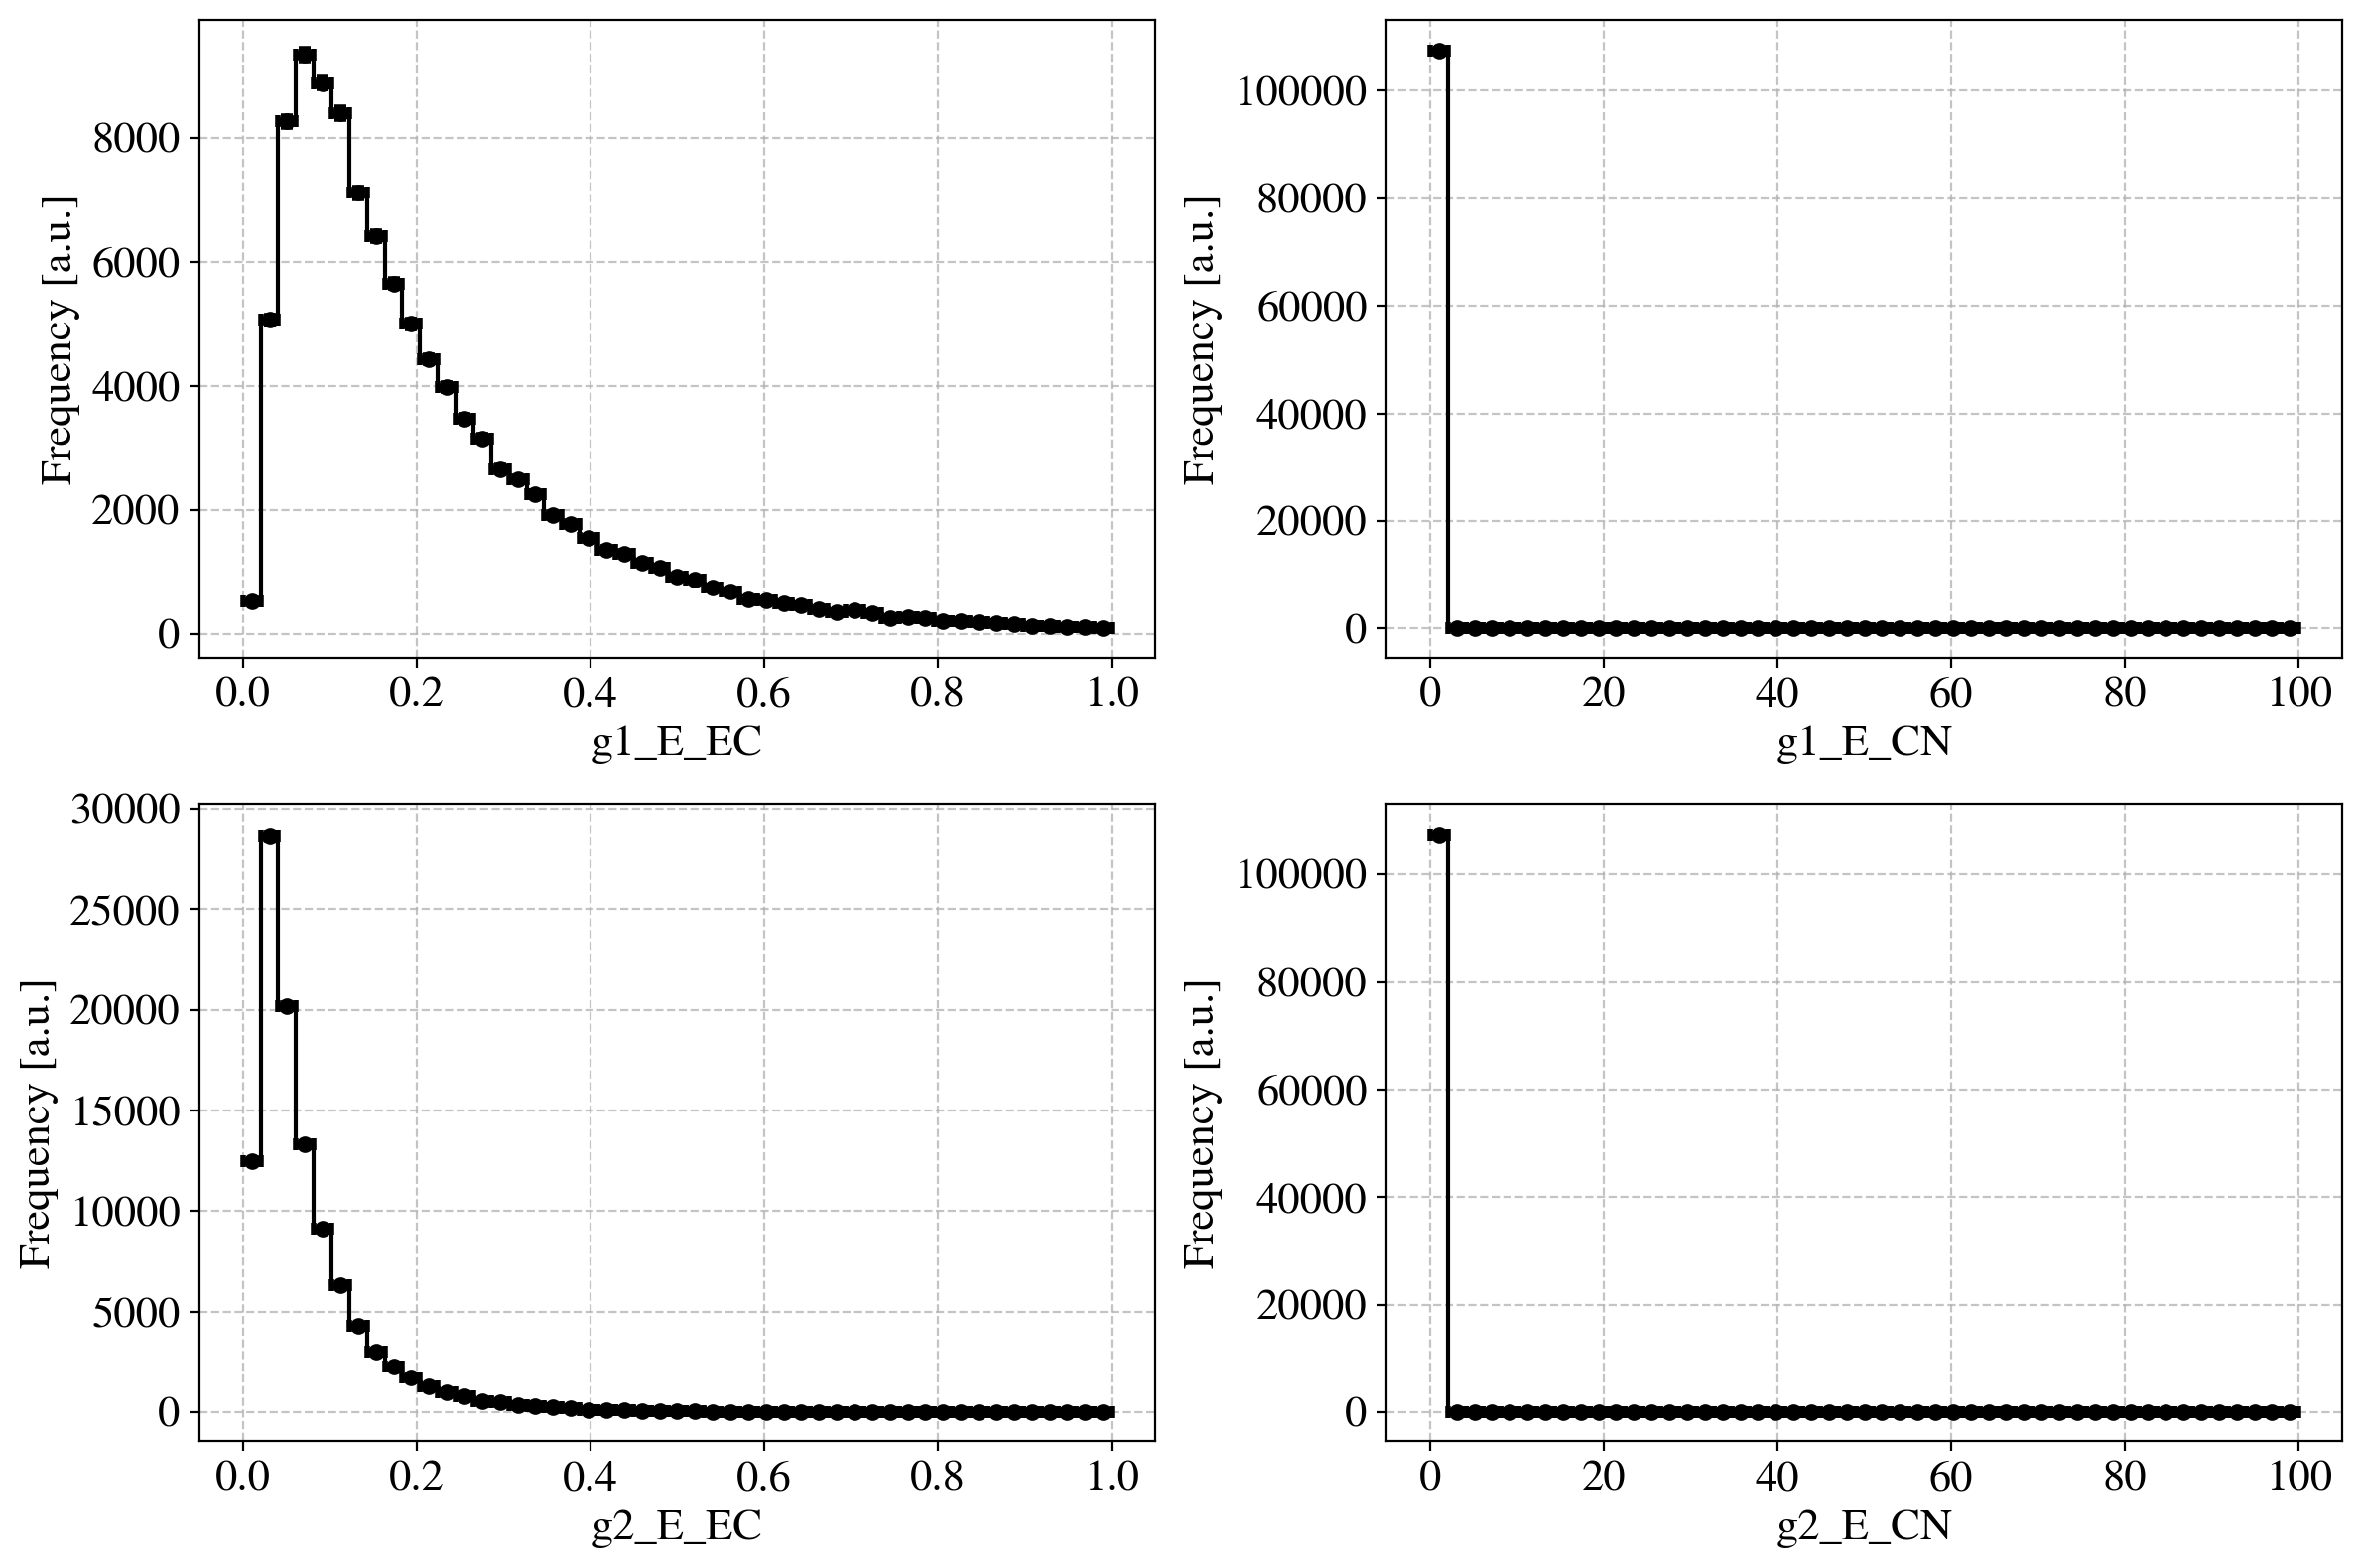

In [25]:
fig = plt.figure(figsize=(12,8),tight_layout=True)

for var,bins,i in zip(["g1_E_EC","g1_E_CN","g2_E_EC","g2_E_CN"],[np.linspace(0,1,50),np.linspace(0,100,50),np.linspace(0,1,50),np.linspace(0,100,50)],[1,2,3,4]):
    x = data_after_cuts[var]
    ax = fig.add_subplot(2,2,i)
    h = plot_step_hist(x,bins=bins);
    set_axes(ax,var,'Frequency [a.u.]',fontsize=16,do_add_grid=True);


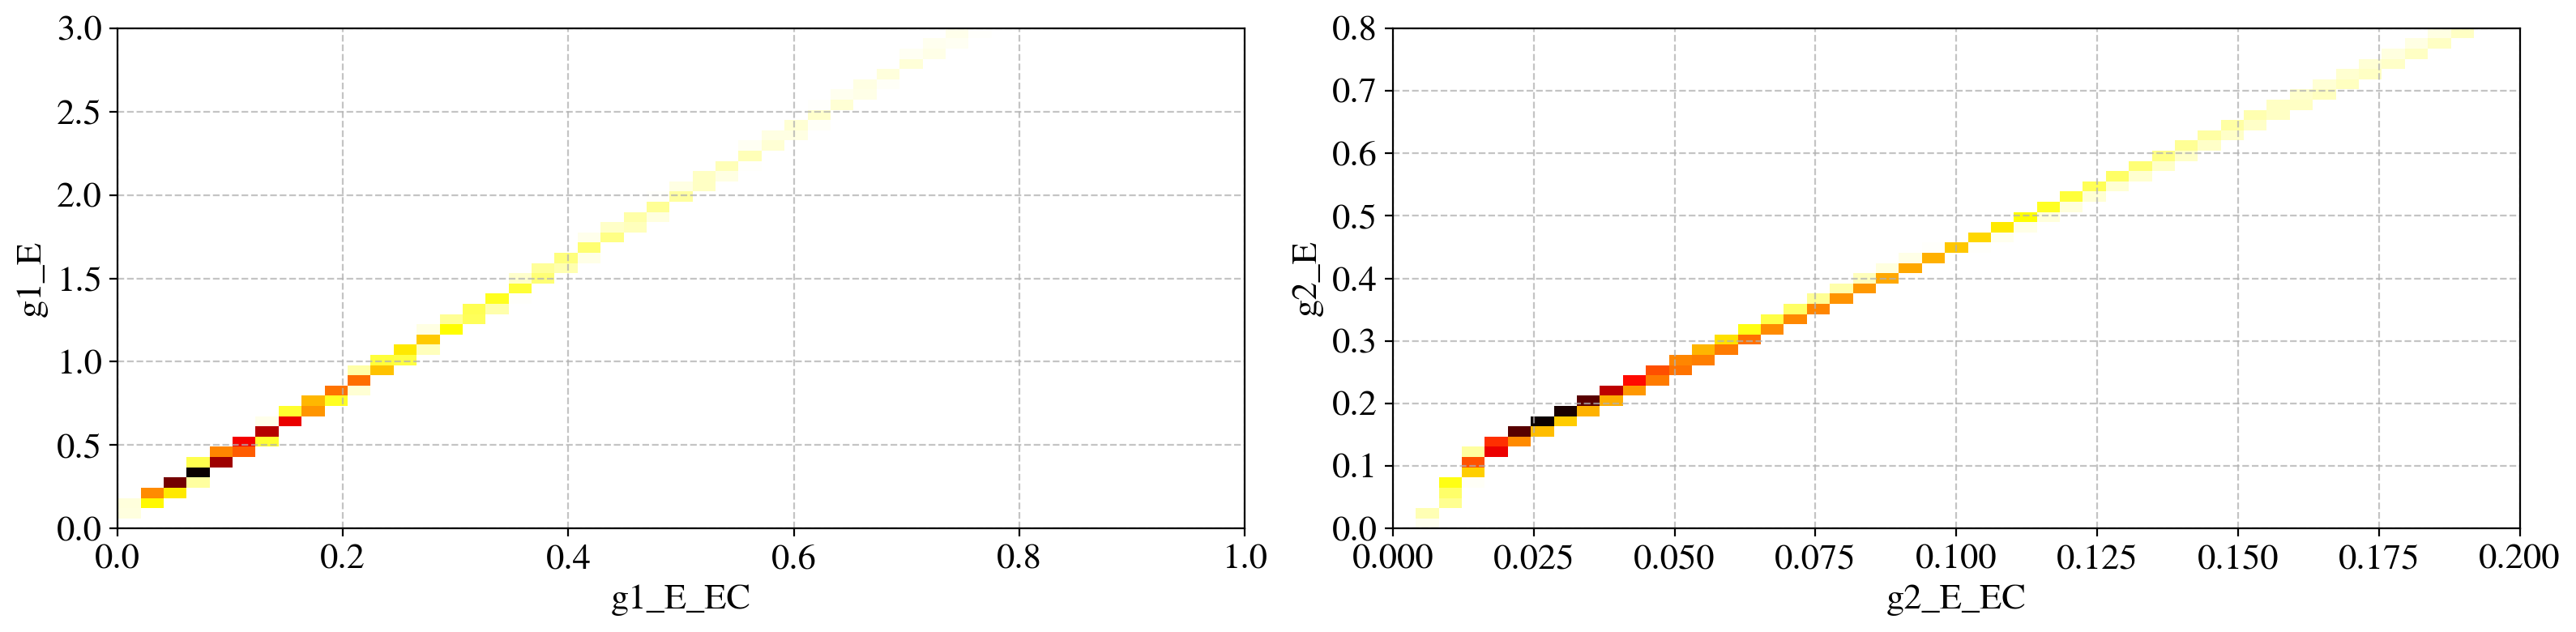

In [24]:
fig = plt.figure(figsize=(16,4),tight_layout=True)
ax = fig.add_subplot(1,2,1)
x = data_after_cuts["g1_E_EC"]
y = data_after_cuts["g1_E"]
bins = (np.linspace(0,1,50),np.linspace(0,3,50))
plot_2d_hist(x,y, bins=bins,ax=ax);
set_axes(ax,'g1_E_EC','g1_E',fontsize=16,do_add_grid=True);

ax = fig.add_subplot(1,2,2)
x = data_after_cuts["g2_E_EC"]
y = data_after_cuts["g2_E"]
bins = (np.linspace(0,0.2,50),np.linspace(0,0.8,50))
plot_2d_hist(x,y, bins=bins,ax=ax);
set_axes(ax,'g2_E_EC','g2_E',fontsize=16,do_add_grid=True);

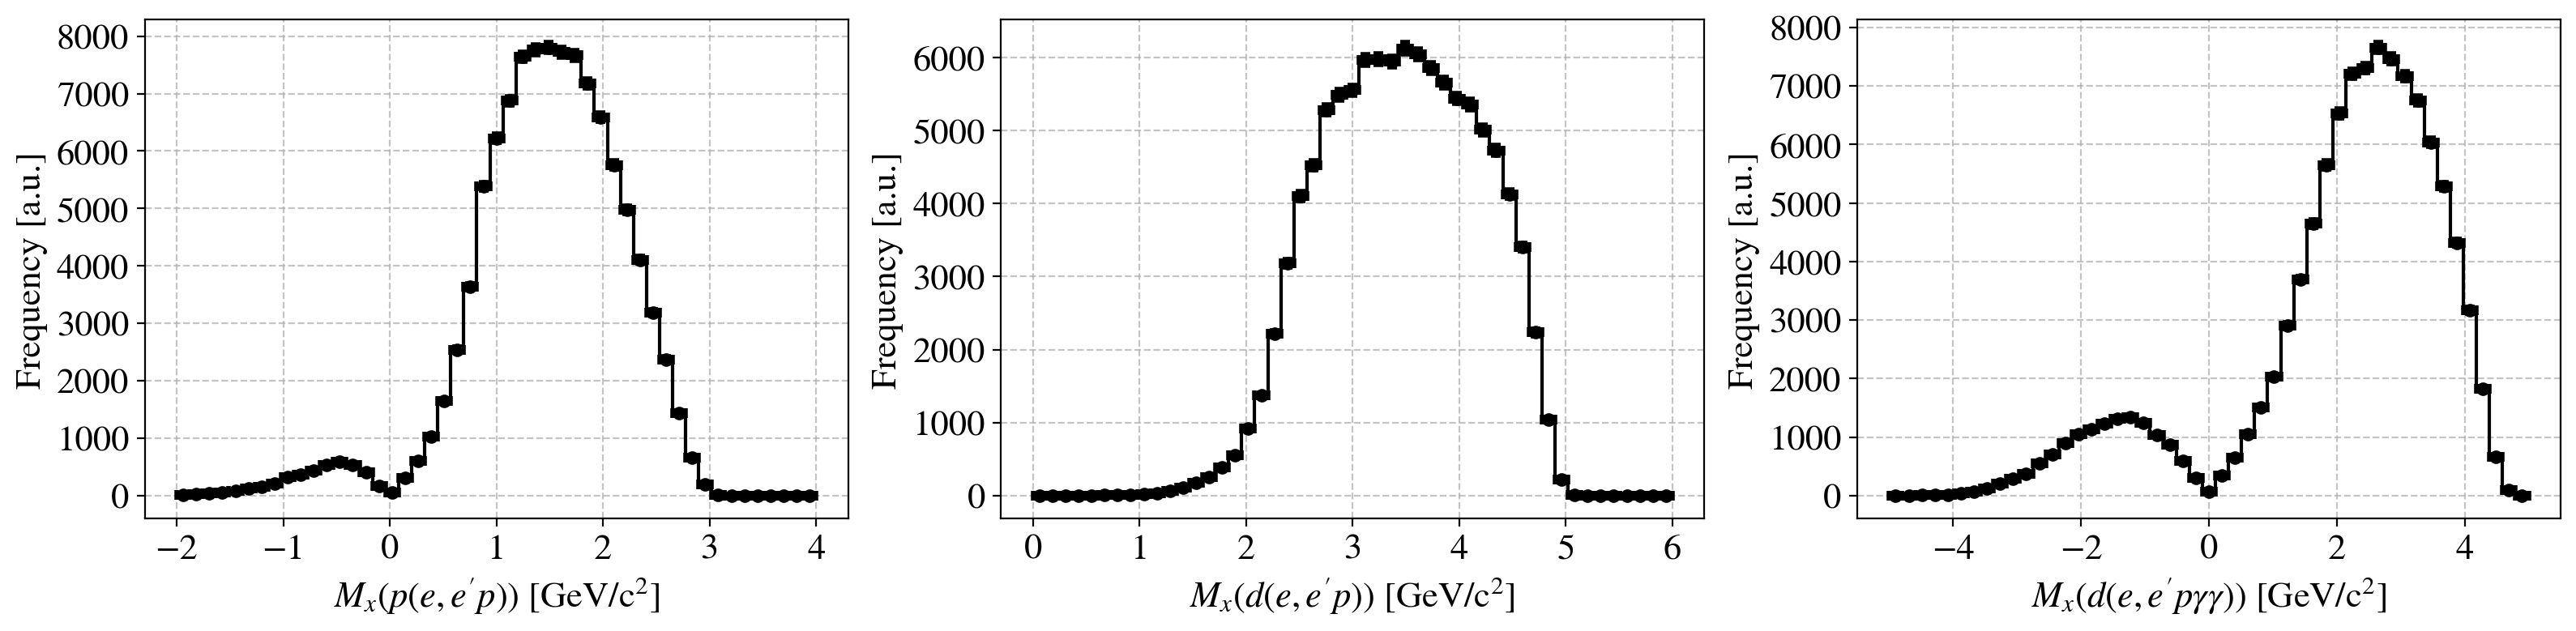

In [58]:
fig = plt.figure(figsize=(16,4),tight_layout=True)

var = "M_x_peep"
x = data_after_cuts[var]
ax = fig.add_subplot(1,3,1)
h = plot_step_hist(x,bins=np.linspace(-2,4,50));
set_axes(ax,"$M_x(p(e,e'p))$ [GeV/c$^2$]",'Frequency [a.u.]',fontsize=16,do_add_grid=True);

var = "M_x_deep"
x = data_after_cuts[var]
ax = fig.add_subplot(1,3,2)
h = plot_step_hist(x,bins=np.linspace(0,6,50));
set_axes(ax,"$M_x(d(e,e'p))$ [GeV/c$^2$]",'Frequency [a.u.]',fontsize=16,do_add_grid=True);

var = "M_x_deep2g"
x = data_after_cuts[var]
ax = fig.add_subplot(1,3,3)
h = plot_step_hist(x,bins=np.linspace(-5,5,50));
set_axes(ax,"$M_x(d(e,e'p\gamma\gamma))$ [GeV/c$^2$]",'Frequency [a.u.]',fontsize=16,do_add_grid=True);
